In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

#데이터 로딩
df = pd.read_csv("C:/Users/wjdqh/injige/car_evaluation.csv", header= None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [8]:
#컬럼명 부여
df.columns=['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output']
df

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [10]:
#결측치 확인
df.isnull().sum()
#결측치 처리
#결측치를 평균값으로 대체할 때-> df['Age'] = df['Age'].fillna(df['Age'].mean())  # Age 결측치 평균값으로 대체
#결측치를 제거할 때-> df.dropna(subset=['Embarked'], inplace=True)  # Embarked의 결측치는 제거 (나머지 컬럼은 처리하지 않음)

price           0
maint           0
doors           0
persons         0
lug_capacity    0
safety          0
output          0
dtype: int64

output
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64
output
unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: proportion, dtype: float64


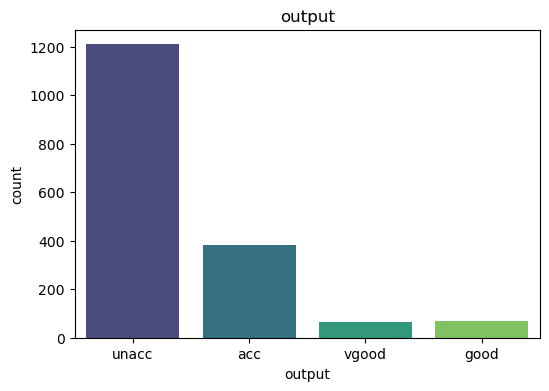

In [16]:
#레이블 분포 확인
print(df['output'].value_counts())

print(df['output'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='output', hue='output', data=df, palette='viridis')
plt.title('output')
plt.show()


In [24]:
#인코딩
from sklearn.preprocessing import LabelEncoder

df.columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output']

columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output']
label_encoders = {}
for column in columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
df

,price,maint,doors,persons,lug_capacity,safety,output
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [26]:
df['output'].value_counts()

output
2    1210
0     384
1      69
3      65
Name: count, dtype: int64

In [20]:
df['output'].value_counts()

<bound method NDFrame.head of           0      1      2     3      4     5      6
0     vhigh  vhigh      2     2  small   low  unacc
1     vhigh  vhigh      2     2  small   med  unacc
2     vhigh  vhigh      2     2  small  high  unacc
3     vhigh  vhigh      2     2    med   low  unacc
4     vhigh  vhigh      2     2    med   med  unacc
...     ...    ...    ...   ...    ...   ...    ...
1723    low    low  5more  more    med   med   good
1724    low    low  5more  more    med  high  vgood
1725    low    low  5more  more    big   low  unacc
1726    low    low  5more  more    big   med   good
1727    low    low  5more  more    big  high  vgood

[1728 rows x 7 columns]>


In [28]:
X = df.drop('output', axis=1).values #X는 output을 제외한 값
y = df['output'].values #y는 output

In [30]:
X

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [32]:
y

array([2, 2, 2, ..., 2, 1, 3])

In [38]:
# 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 훈련, 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1382, 6), (346, 6), (1382,), (346,))

In [50]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

#SVM

clf_svm = SVC(random_state=0) #SVM 모델 생성 (기본 커널 사용)
clf_svm.fit(X_train, y_train) #학습 데이터(X_train, y_train)를 사용하여 모델 학습

pred_svm = clf_svm.predict(X_test) #학습된 모델을 이용해 테스트 데이터(X_test) 예측

print("\n--- SVM Classifier ---")
print("Accuracy:",accuracy_score(y_test, pred_svm))  #정확도 계산 
print("Confusion Matrix:\n",confusion_matrix(y_test, pred_svm)) #혼동행렬 출력

 ACCURACY OF OTHER ML CLASSIFIERS

--- SVM Classifier ---
Accuracy: 0.9132947976878613
Confusion Matrix:
 [[ 73   1   4   1]
 [  7   8   0   2]
 [ 12   0 228   0]
 [  3   0   0   7]]


In [44]:
#DT

#결정 트리 모델 생성 및 학습
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

#테스트 데이터 예측
pred_dt = clf_dt.predict(X_test)

#정확도 및 혼동 행렬 출력
print ("\n--- Decision Tree Classifier ---")
print ("Accuracy:",accuracy_score(y_test, pred_dt))
print ("Confusion Matrix:\n",confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9682080924855492
[[ 71   4   4   0]
 [  0  17   0   0]
 [  2   0 238   0]
 [  1   0   0   9]]


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')  #경고 메세지를 무시

#RF

#랜덤 포레스트 모델 생성 및 학습
print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

#테스트 데이터 예측
pred = rf_clf.predict(X_test)

#정확도 및 혼동 행렬 출력
print("Accuracy:",accuracy_score(y_test,pred))
print ("Confusion Matrix:\n",confusion_matrix(y_test, pred))


--- Radom Forest ---
Accuracy: 0.9653179190751445
Confusion Matrix:
 [[ 73   4   1   1]
 [  1  13   0   3]
 [  1   0 239   0]
 [  1   0   0   9]]


In [54]:
#LR
from sklearn.linear_model import LogisticRegression

#로지스틱 회귀 모델 생성 및 학습
print("\n--- Logistic Regression ---")
lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train, y_train)
pred_lr = lr_clf.predict(X_test)

#테스트 데이터 예측
print("Accuracy:", accuracy_score(y_test, pred_lr))

#정확도 및 혼동 행렬 출력
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_lr))


--- Logistic Regression ---
Accuracy: 0.6502890173410405
Confusion Matrix:
 [[  9   0  67   3]
 [  1   0  16   0]
 [ 22   0 214   4]
 [  2   0   6   2]]
